<a href="https://colab.research.google.com/github/Radhika02-rjn/Radhika02-rjn/blob/main/food_product_sales_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error: 0.4163750000000016
R^2 Score: 0.9999903095199265


<ipython-input-27-5af846c16f33>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')


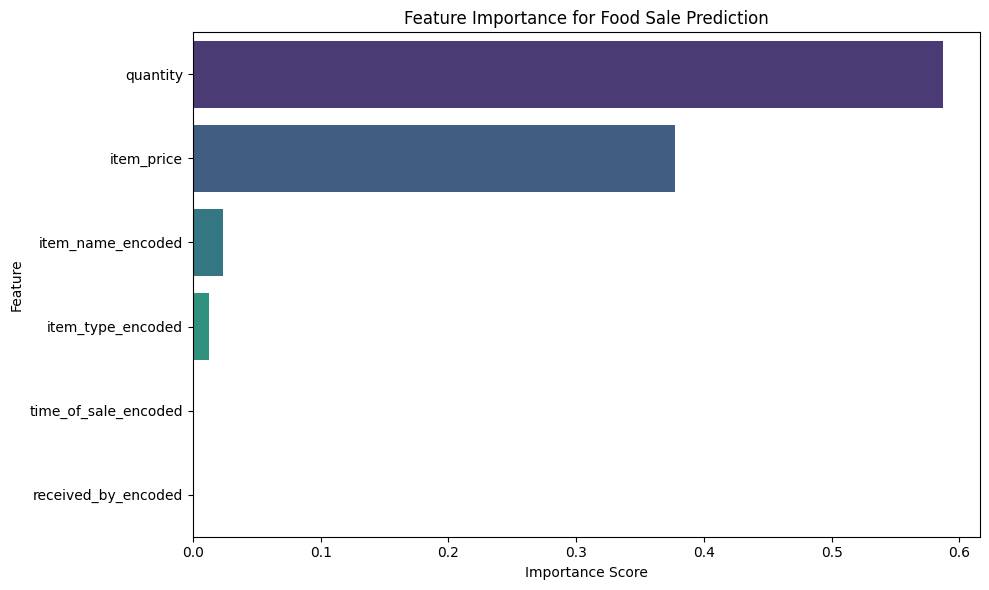

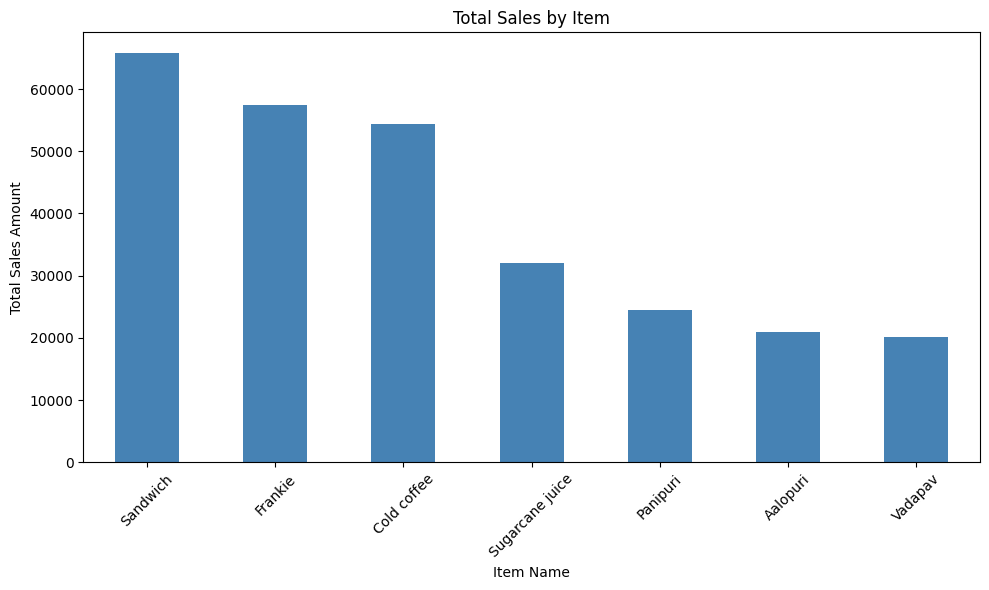

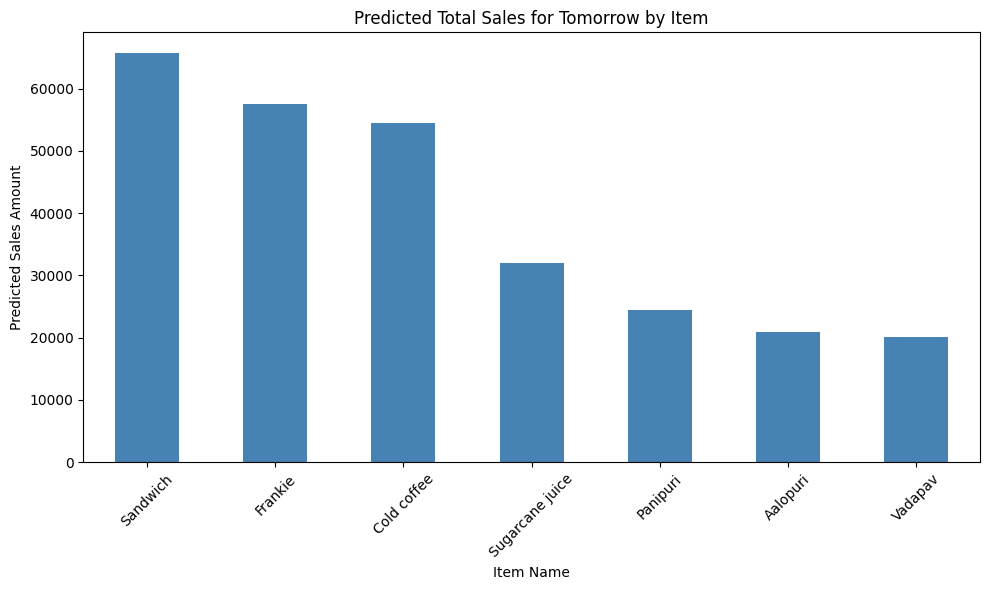

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Load your dataset
df = pd.read_csv('/content/Balaji Fast Food Sales.csv')

# Create a new feature for total sale amount
df['total_sale'] = df['item_price'] * df['quantity']

# Initialize LabelEncoder and encode categorical variables
le_item_name = LabelEncoder()
le_item_type = LabelEncoder()
le_received_by = LabelEncoder()
le_time_of_sale = LabelEncoder() # Create a LabelEncoder for 'time_of_sale'


# Fit LabelEncoder to 'item_name', 'item_type', and 'received_by'
df['item_name_encoded'] = le_item_name.fit_transform(df['item_name'])
df['item_type_encoded'] = le_item_type.fit_transform(df['item_type'])
df['received_by_encoded'] = le_received_by.fit_transform(df['received_by'])
df['time_of_sale_encoded'] = le_time_of_sale.fit_transform(df['time_of_sale']) # Encode 'time_of_sale'


# Combine features (Now using encoded columns, including 'time_of_sale_encoded')
X = df[['item_price', 'quantity', 'time_of_sale_encoded', 'item_name_encoded', 'item_type_encoded', 'received_by_encoded']] # Include 'time_of_sale_encoded'

y = df['total_sale']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


# Feature Importance Chart
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')
plt.title("Feature Importance for Food Sale Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Sales by Item Chart (for current dataset)
plt.figure(figsize=(10, 6))
item_sales = df.groupby('item_name')['total_sale'].sum().sort_values(ascending=False)
item_sales.plot(kind='bar', color='steelblue')
plt.title("Total Sales by Item")
plt.ylabel("Total Sales Amount")
plt.xlabel("Item Name")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Prepare a dataset with the same structure but for tomorrow's sales.
df_tomorrow = df.copy()
df_tomorrow['date'] = pd.Timestamp.now().floor('D') + pd.Timedelta(days=1)  # Set date to tomorrow

# Encode categorical variables for tomorrow
df_tomorrow['item_name_encoded'] = le_item_name.transform(df_tomorrow['item_name'])
df_tomorrow['item_type_encoded'] = le_item_type.transform(df_tomorrow['item_type'])
df_tomorrow['received_by_encoded'] = le_received_by.transform(df_tomorrow['received_by'])
df_tomorrow['time_of_sale_encoded'] = le_time_of_sale.transform(df_tomorrow['time_of_sale']) # Encode 'time_of_sale' for tomorrow's data


# Combine features for tomorrow's sales
X_tomorrow = df_tomorrow[['item_price', 'quantity', 'time_of_sale_encoded', 'item_name_encoded', 'item_type_encoded', 'received_by_encoded']] # Use 'time_of_sale_encoded'

# Predict total sales for tomorrow
y_tomorrow_pred = model.predict(X_tomorrow)

# Add predictions for total sales tomorrow
df_tomorrow['predicted_total_sale'] = y_tomorrow_pred

# Reverse encoding of item names for the predicted sales visualization
df_tomorrow['item_name'] = le_item_name.inverse_transform(df_tomorrow['item_name_encoded'])

# Group by item and sum up predicted sales for tomorrow
tomorrow_sales = df_tomorrow.groupby('item_name')['predicted_total_sale'].sum().sort_values(ascending=False)

# Plot the predicted sales for tomorrow
plt.figure(figsize=(10, 6))
tomorrow_sales.plot(kind='bar', color='steelblue')
plt.title("Predicted Total Sales for Tomorrow by Item")
plt.ylabel("Predicted Sales Amount")
plt.xlabel("Item Name")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()